**ptbdb_abnormal.csv**: This file contains 10506 heartbeat recordings from patients with abnormal heart conditions. Each recording is of length 188 and contains two columns, the first column represents the values of the electrocardiogram signal, and the second column contains the labels of the heartbeat recordings (1 for abnormal beats and 0 for normal beats).

**ptbdb_normal.csv**: This file contains 4046 heartbeat recordings from healthy individuals. Each recording is of length 188 and contains two columns, the first column represents the values of the electrocardiogram signal, and the second column contains the labels of the heartbeat recordings (0 for normal beats and 1 for abnormal beats).

### Importing the libraries

In [24]:
!pip install PyEMD
!pip install EMD-signal
from PyEMD import EMD

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading the dataset into a pandas dataframe

In [3]:
abnormal_HeartData = pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv', header=None)
normal_HeartData = pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv', header=None)

In [4]:
abnormal_HeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
normal_HeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualizing a heartbeat signal

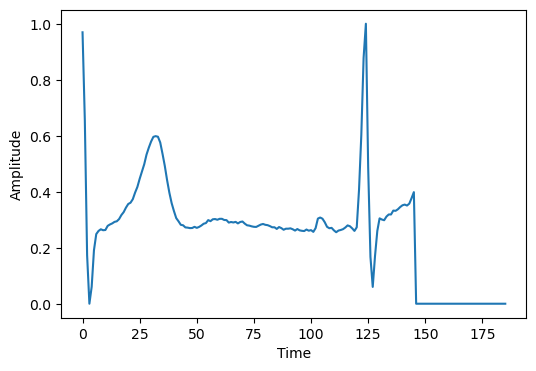

In [8]:
nor_hbeat = normal_HeartData.iloc[10, :-2]

# Plot the heartbeat as a signal
plt.figure(figsize=(6, 4))
plt.plot(nor_hbeat)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### Applying Emperical Mode Decomposition

Extracting a single heartbeat signal and applying Empirical Mode Decomposition (EMD) to it for analyzing the underlying Intrinsic Mode Functions (IMFs) and original signal using Matplotlib.

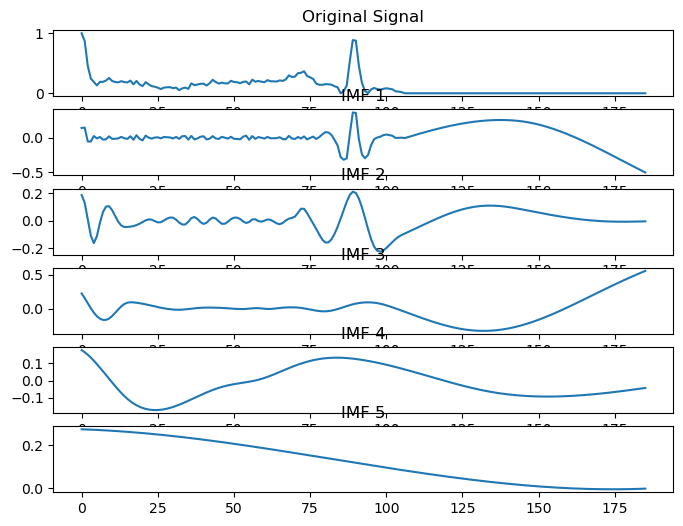

In [18]:
heartbeat = abnormal_HeartData.iloc[15, :-2].values

emd = EMD()
IMFs = emd(heartbeat) 

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(heartbeat)
plt.title('Original Signal')
for i in range(len(IMFs)):
    plt.subplot(len(IMFs)+1, 1, i+2)
    plt.plot(IMFs[i])
    plt.title('IMF %d' % (i+1))
plt.show()

### Reconstructing a Signal from Intrinsic Mode Functions (IMFs) using Empirical Mode Decomposition (EMD)

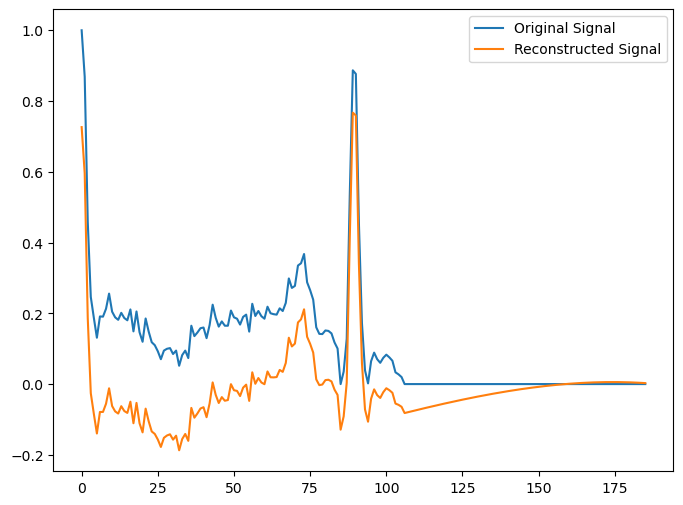

In [19]:
# Combine the IMFs to form the new signal
new_signal = np.sum(IMFs[:-1], axis=0)

# Plot the original signal and the reconstructed signal
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(heartbeat, label='Original Signal')
plt.plot(new_signal, label='Reconstructed Signal')
plt.legend()
plt.show()

### Converting a single signal into a 2D image

**Algorithm**: We had computed the energy of overlapping frames of an heart beat signal using a sliding window approach. The energy values of each frame are stored in a 2D array and are then converted into a grayscale image by multiplying with a scaling factor. Finally, the original signal and the energy image are displayed using matplotlib.

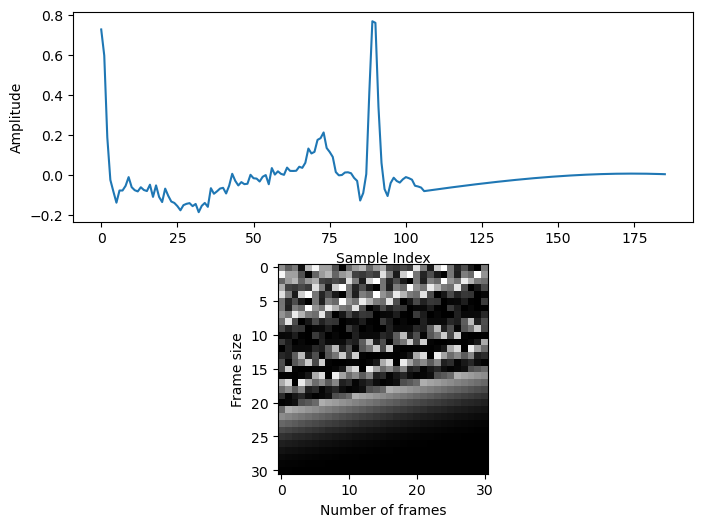

In [20]:
no_frames = 31
frame_size = 31
step_size = 5

# intilizing the energy values array
energies = np.zeros((no_frames, frame_size))

for i in range(0, len(new_signal)-frame_size, step_size):
    for j in range(i, i+frame_size):
        x = int(i/step_size)
        y = int(j-i)
        energies[x][y] = np.square(new_signal[j])
        
energies *= 100

# Converting to grayscale image
image = np.uint8(energies*255)

# Display the original signal and the energy image
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(new_signal)
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Amplitude')
axs[1].imshow(image, cmap='gray')
axs[1].set_xlabel('Number of frames')
axs[1].set_ylabel('Frame size')
plt.show()

### Concatenating the abnormal data with the normal data

In [21]:
full_data =  pd.concat([abnormal_HeartData, normal_HeartData], axis=0, ignore_index=True)
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Shuffling the data

In [22]:
full_data = full_data.sample(frac=1, random_state=0)
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
13047,1.0,0.619401,0.400764,0.210571,0.210571,0.229888,0.231798,0.227553,0.228402,0.226067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1392,1.0,0.675706,0.525424,0.183051,0.144068,0.094350,0.063277,0.053672,0.067797,0.070056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9452,1.0,0.280029,0.036109,0.143699,0.126013,0.061164,0.031688,0.039794,0.021371,0.035372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9390,1.0,0.775580,0.000000,0.105363,0.345759,0.502092,0.520350,0.498288,0.525295,0.516546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11643,1.0,0.611136,0.391146,0.108170,0.060246,0.195345,0.284345,0.298494,0.324509,0.324509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting Data into Training and Testing Sets

In [26]:
X = full_data.loc[:, :186]
y = full_data.loc[:, 187]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Function for converting the signals into an image

In [27]:
# Import the EMD function from PyEMD library
emd = EMD()

# Function to convert 1D ECG signal to 2D image using EMD and energy values
def signal_to_2dImage(data):
    images = [] # Empty list to store the 2D images
    no_frames = 31 # Number of frames
    frame_size = 31 # Size of each frame
    step_size = 5 # Step size between each frame
    
    # Loop over all the ECG signals in the input data
    for i in range(data.shape[0]):
        signal = data.iloc[i, :-1].values  # Extract the i-th ECG signal
        IMFs = emd(signal)  # Apply EMD on the ECG signal
        new_signal = np.sum(IMFs[:-1], axis=0)  # Combine the IMFs to form a new signal
    
        # Calculate the energy values for each frame of the new signal
        energies = np.zeros((no_frames, frame_size))
        for i in range(0, len(new_signal)-frame_size, step_size):
            for j in range(i, i+frame_size):
                x = int(i/step_size)
                y = int(j-i)
                energies[x][y] = np.square(new_signal[j])
    
        energies *= 100  # Scale the energy values by a factor of 100
        image = np.uint8(energies*255)  # Convert the energy values to a grayscale image
        images.append(image)  # Add the image to the list of images

    return images  # Return the list of 2D images

Creating 2D images from the training data using EMD and signal processing techniques.

In [28]:
train_images = signal_to_2dImage(X_train)
print(len(train_images))

10186


Creating 2D images from the testing data using EMD and signal processing techniques.

In [29]:
test_images = signal_to_2dImage(X_test)
print(len(test_images))

4366


## Feature Extraction Methods

### 1. Gabour Filters

In [30]:
import cv2
from scipy.signal import convolve2d

# Function to calculate skewness of a 1D array
def skew(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

# Function to calculate kurtosis of a 1D array
def kurtosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment/s_4 - 3

# Function to extract texture features from an image
def extract_texture_features(img):
    # Create a bank of Gabor filters
    kernels = []
    ksize = 21
    for theta in range(4):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for frequency in (0.05, 0.25):
                kernel = np.real(cv2.getGaborKernel((ksize, ksize), sigma, theta, frequency, 0.5, 0, ktype=cv2.CV_32F))
                kernels.append(kernel)
                
    responses = []
    for kernel in kernels:
        response = convolve2d(img, kernel, mode='full', boundary='fill')
        responses.append(response)
        
    # Extract statistical features from the filtered response
    features = []
    for response in responses:
        feature = [np.max(response), np.min(response), np.mean(response), np.std(response, ddof=1), np.var(response), skew(response), kurtosis(response)]
        features.append(feature)
        
    return features

### Extracting texture features from images and generating train and test feature sets

In [31]:
Trainfeatures = []
Testfeatures = []

for i in range(len(train_images)):
    features = extract_texture_features(train_images[i])
    Trainfeatures.append(features)

for i in range(len(test_images)):
    features = extract_texture_features(test_images[i])
    Testfeatures.append(features)
    
print(len(Trainfeatures), len(Testfeatures))

10186 4366


### Random Forest Classifier for Image Texture Classification

This code uses a random forest classifier to classify images based on their texture features. The code first converts the feature lists for the training and testing data into numpy arrays, and then reshapes them into 2D arrays for use with the classifier. The classifier is trained using the training data and used to predict the labels of the test data. Finally, the code calculates and prints the evaluation metrics of the predictions, including accuracy, precision, recall, and F1 score.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Convert the feature lists into numpy arrays
train_features = np.array(Trainfeatures)
test_features = np.array(Testfeatures)

# Reshape the feature arrays to 2D arrays to be used for training and testing
train_X = train_features.reshape(train_features.shape[0], -1)
test_X = test_features.reshape(test_features.shape[0], -1)

# Initialize a random forest classifier and fit the training data
clf = RandomForestClassifier(random_state=5)
clf.fit(train_X, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = clf.predict(test_X)

# Calculate the accuracy, precision, recall, and F1 score of the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.2f} %".format(accuracy*100))
print("Precision: {:.2f} %".format(precision*100))
print("F1 Score: {:.2f} %".format(f1*100))
print("Recall Score: {:.2f} %".format(recall*100))

Accuracy: 75.84 %
Precision: 73.20 %
F1 Score: 72.68 %
Recall Score: 75.84 %


### 2. Feature Extraction using Local Binary Pattern (LBP)

In [33]:
from skimage.feature import local_binary_pattern

# Define a function to extract Local Binary Pattern (LBP) features from an image
def lbp_image_feature(img):
    # Set the radius of the circular LBP sampling region
    radius = 4
    # Set the number of sampling points around the circle
    n_points = 6 * radius
    # Set the LBP method to "ror" (Rotation-Invariant Uniform Patterns with Rounding)
    method = 'ror'
    # Compute the LBP feature vector for the input image and flatten it into a 1D array
    lbp = local_binary_pattern(img, n_points, radius, method).ravel()
    return lbp


In [34]:
Trainfeatures = []
Testfeatures = []

for i in range(len(train_images)):
    features = lbp_image_feature(train_images[i])
    Trainfeatures.append(features)

for i in range(len(test_images)):
    features = lbp_image_feature(test_images[i])
    Testfeatures.append(features)
    
print(len(Trainfeatures), len(Testfeatures))

10186 4366


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Convert the feature lists into numpy arrays
train_features = np.array(Trainfeatures)
test_features = np.array(Testfeatures)

# Reshape the feature arrays to 2D arrays to be used for training and testing
train_X = train_features.reshape(train_features.shape[0], -1)
test_X = test_features.reshape(test_features.shape[0], -1)

# Initialize a random forest classifier and fit the training data
clf = RandomForestClassifier(random_state=5)
clf.fit(train_X, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = clf.predict(test_X)

# Calculate the accuracy, precision, recall, and F1 score of the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.2f} %".format(accuracy*100))
print("Precision: {:.2f} %".format(precision*100))
print("F1 Score: {:.2f} %".format(f1*100))
print("Recall Score: {:.2f} %".format(recall*100))

Accuracy: 84.13 %
Precision: 84.45 %
F1 Score: 82.41 %
Recall Score: 84.13 %


## 3. Feature Extraction using Haralick Texture Features with Mahotas Library

In [36]:
# Install the mahotas library using pip
!pip install mahotas

# Import the mahotas library
import mahotas as mh

def haralick_image_feature(image):
    # Compute the Haralick texture features using the mahotas library
    features = mh.features.haralick(image)
    
    # Convert the 2D array of features to a 1D array
    feature_vector = np.ravel(features)
    
    return feature_vector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 51.6 MB/s eta 0:00:0000:0100:01


In [37]:
Trainfeatures = []
Testfeatures = []

for i in range(len(train_images)):
    features = haralick_image_feature(train_images[i])
    Trainfeatures.append(features)

for i in range(len(test_images)):
    features = haralick_image_feature(test_images[i])
    Testfeatures.append(features)
    
print(len(Trainfeatures), len(Testfeatures))

10186 4366


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Convert the feature lists into numpy arrays
train_features = np.array(Trainfeatures)
test_features = np.array(Testfeatures)

# Reshape the feature arrays to 2D arrays to be used for training and testing
train_X = train_features.reshape(train_features.shape[0], -1)
test_X = test_features.reshape(test_features.shape[0], -1)

# Initialize a random forest classifier and fit the training data
clf = RandomForestClassifier(random_state=5)
clf.fit(train_X, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = clf.predict(test_X)

# Calculate the accuracy, precision, recall, and F1 score of the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.2f} %".format(accuracy*100))
print("Precision: {:.2f} %".format(precision*100))
print("F1 Score: {:.2f} %".format(f1*100))
print("Recall Score: {:.2f} %".format(recall*100))

Accuracy: 78.84 %
Precision: 77.31 %
F1 Score: 76.90 %
Recall Score: 78.84 %


## 4. SFTA Feature Extraction using Sobel Filter and Histogram Binning

In [39]:
import cv2

def SFTA_feature(image):
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

    # Calculate SFTA features
    num_bins = 8
    bin_size = 180 / num_bins
    sfta_features = []
    for i in range(num_bins):
        bin_mask = np.logical_and(direction >= i*bin_size, direction < (i+1)*bin_size)
        sfta_bin = np.sum(magnitude[bin_mask])
        sfta_features.append(sfta_bin)

    sfta_features = np.array(sfta_features)
    sfta_features /= np.sum(sfta_features)

    return sfta_features

In [40]:
Trainfeatures = []
Testfeatures = []

for i in range(len(train_images)):
    features = SFTA_feature(train_images[i])
    Trainfeatures.append(features)

for i in range(len(test_images)):
    features = SFTA_feature(test_images[i])
    Testfeatures.append(features)
    
print(len(Trainfeatures), len(Testfeatures))

10186 4366


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Convert the feature lists into numpy arrays
train_features = np.array(Trainfeatures)
test_features = np.array(Testfeatures)

# Reshape the feature arrays to 2D arrays to be used for training and testing
train_X = train_features.reshape(train_features.shape[0], -1)
test_X = test_features.reshape(test_features.shape[0], -1)

# Initialize a random forest classifier and fit the training data
clf = RandomForestClassifier(random_state=5)
clf.fit(train_X, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = clf.predict(test_X)

# Calculate the accuracy, precision, recall, and F1 score of the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.2f} %".format(accuracy*100))
print("Precision: {:.2f} %".format(precision*100))
print("F1 Score: {:.2f} %".format(f1*100))
print("Recall Score: {:.2f} %".format(recall*100))

Accuracy: 72.88 %
Precision: 68.48 %
F1 Score: 68.72 %
Recall Score: 72.88 %
